## EAS 503 Homework 3 Submission
Name - Suhit Datta

**Make sure that you rename the notebook file to *replacewithubitname*_eas503_hw3.ipynb**


### Submission Details 
* **Due Date** - October 31, 2017 by 11.59 PM PST. All assignments have to be submitted using UBLearns.
* **Number of Problems** - 2 
* **Maximum points** - 50
* **Collaboration policy**
 - Every student has to submit individual homeworks
 - Any collaboration, in the form of discussion, with other members of the class is permitted, as long as the names of the collaborating members are explicitly stated on top of the submitted homework.
 - Any overlap with another submission or material from Internet will be awarded an F.
* **Late submission policy** - _No late submissions allowed_
* **Submission Format** - Enter code for each problem in the appropriate cell below. You may use multiple cells for a single problem to improve readability.

### Problem 1 - Chicago Crime Data (25 points)

The Chicago Crime Data reflects the crime incidents that occured in the city of Chicago during 2016 and 2017. The data is provided in the `chicago_crime_data_v2.csv` file. For each crime incident, there is information regarding the case ID, crime location, description, primary crime type ID, coordinates of the crime etc. To identify the primary crime type (denoted by the `Primary type` variable), the `primary_type_ID.csv` file is provided which maps the primary crime type to their corresponding ID.

For this problem, the goal is to identify the crime types that have occurred more than 10,000 times during the years 2016 and 2017. For this,

1. Import the CSV files as dataframes using pandas.

2. Sort the crime data file by crime ID and merge the two files by `Primary Type ID` variable. 

3. Identify the crime types that have a frequency >10,000 and list them as `High Frequency Crime Types`. Provide a timeseries plot for all `High Frequency Crime Types`. For this, compute the number of crimes that occur per each crime type per month (2016 Jan - 2017 Dec). Use the `series.plot` method in Pandas for Series objects. 

4. Using the code provided below, plot all the crimes that come under `High Frequency Crime Types` on a map of Chicago. For this, use the location information provided in the data. For any crimes with missing location coordinates, sort the data by ascending `Date` and use forward fill.  

(Make sure that each data point must be plotted as a transparent circular dots with a markersize of atleast 20 and alpha set to atmost 0.5 (transparency))


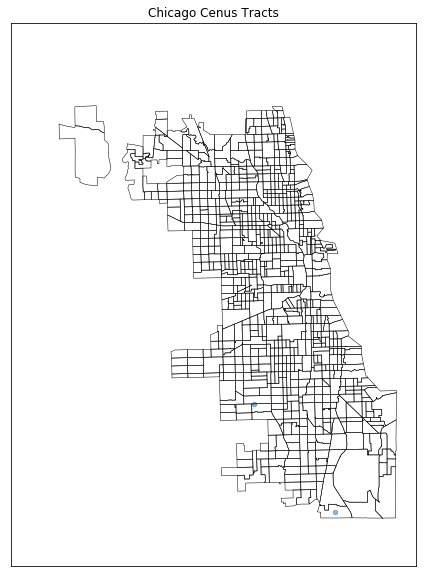

In [4]:
from mpl_toolkits.basemap import Basemap
import numpy as np
import matplotlib.pyplot as plt

fig = plt.figure(figsize=[16,10])
m = Basemap(projection='merc',llcrnrlat=41.60,urcrnrlat=42.10,\
        llcrnrlon=-88.0,urcrnrlon=-87.50,lat_ts=20,resolution='c')
m.readshapefile('./geo_export_0e3da441-8fe8-4e11-9ca0-42ef75cab68e','chicago')
lons = [-87.6,-87.7]
lats = [41.65,41.75]
x,y = m(lons,lats)
plt.scatter(x,y,alpha=0.5,s=20)
plt.title("Chicago Cenus Tracts")
plt.show()

           Primary Type   Count
0               ASSAULT   31143
1               BATTERY   81995
2              BURGLARY   22524
3       CRIMINAL DAMAGE   49746
4     CRIMINAL TRESPASS   10747
5    DECEPTIVE PRACTICE   28994
6   MOTOR VEHICLE THEFT   18505
7             NARCOTICS   20184
8         OTHER OFFENSE   28597
9               ROBBERY   19076
10                THEFT  101246
ASSAULT_df
[1225, 1241, 1640, 1508, 1786, 1816, 1711, 1761, 1693, 1666, 1423, 1262, 1373, 1294, 1481, 1635, 1846, 1851, 1812, 1119]
BATTERY_df
[3727, 3497, 4274, 4027, 4714, 4849, 4685, 4587, 4314, 4342, 3818, 3443, 3561, 3408, 3853, 4097, 4555, 4641, 4688, 2915]
BURGLARY_df
[1182, 843, 1048, 946, 1106, 1080, 1349, 1372, 1372, 1313, 1377, 1299, 1269, 1007, 929, 965, 1053, 1066, 1189, 759]
CRIMINAL DAMAGE_df
[2373, 2089, 2538, 2392, 2733, 2641, 2987, 2973, 2846, 2758, 2580, 2098, 2414, 2046, 2233, 2446, 2515, 2570, 2733, 1781]
CRIMINAL TRESPASS_df
[462, 438, 499, 505, 586, 590, 568, 578, 579, 552, 484, 464, 57

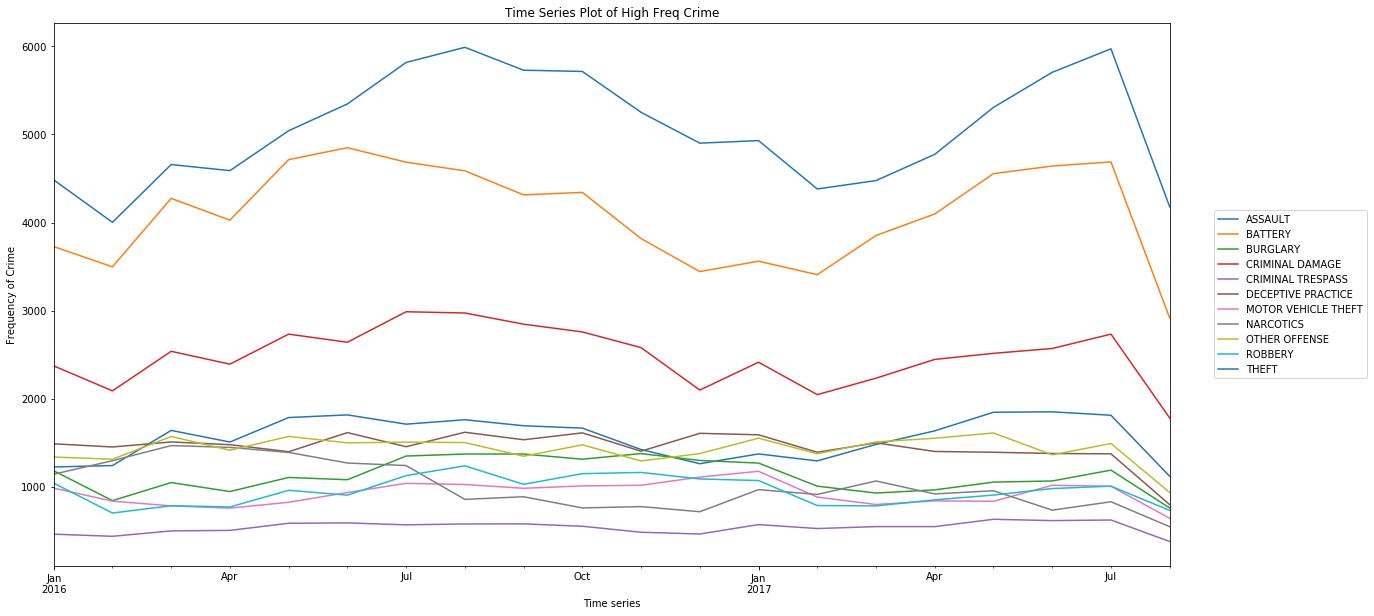

In [5]:
#Enter your solution here
import pandas as pd
import matplotlib.pyplot as plt
%matplotlib inline

cdataDF = pd.read_csv('Chicago_crime_data.csv')
primidDF = pd.read_csv('primary_type_id.csv')

# print(primidDF.columns)
cdataDF = cdataDF.sort_values('Crime_ID')
mergedDF = pd.merge(cdataDF,primidDF,on='Primary Type ID')
# print("the shape of merged DF is " ,mergedDF.shape)
m = pd.DataFrame(mergedDF.groupby(['Primary Type']).size())
HFCrimesList =[]
for  index, row in m.iterrows():
    if(row[0] > 10000):
        HFCrimesList.append([index,row[0]])

HFCrimeTypesDF = pd.DataFrame(HFCrimesList)
HFCrimeTypesDF.columns = ['Primary Type','Count']
print(HFCrimeTypesDF)
# print(HFCrimeTypesDF.columns)
hfcrimes = HFCrimeTypesDF['Primary Type']
reducedDF = mergedDF.loc[mergedDF['Primary Type'].isin(hfcrimes)]
reducedDF.is_copy=False

reducedDF['Date'] = pd.to_datetime(reducedDF['Date'])
reducedDF['Date'] = reducedDF['Date'].dt.month 

reducedDF['CustomDate'] =  reducedDF['Year'].astype(str) + reducedDF['Date'].astype(str)
reducedDF['CustomDate'] = pd.to_datetime(reducedDF['CustomDate'],format='%Y%m')
reducedDF = reducedDF.sort_values(by = ['CustomDate'])
# print(reducedDF.columns)
hfCrimeNameList = []
hfCrimeDataList = []
hfCrime_DF = pd.DataFrame()
for i in hfcrimes : 
    highFreDict ={}
    nameDF = i + "_df"
    print(nameDF)
    hfCrimeNameList.append(nameDF)
    nameDF = reducedDF.loc[reducedDF['Primary Type'] == i]
#     nameDF = nameDF.sort_values(by = ['CustomDate'])
    m1 = pd.DataFrame(nameDF.groupby(['CustomDate']).size())
    ind = m1.index
#     print("ini index ",ind)
    rowList =[]
    for index ,row in m1.iterrows():
        rowList.append(row[0])
    print(rowList)
    df_indv = pd.DataFrame({i: rowList},index=ind)
    hfCrime_DF = pd.concat([hfCrime_DF,df_indv], axis=1)
    
# hfCrime_DF.plot()
hfCrime_DF.plot(figsize=(20,10))
plt.title('Time Series Plot of High Freq Crime',color='black')
plt.xlabel('Time series');
plt.ylabel('Frequency of Crime');
plt.legend(bbox_to_anchor=(1.04,0.5), loc="center left", borderaxespad=0)
        
# reducedDF.to_csv("reduced.csv", sep='\t', encoding='utf-8')

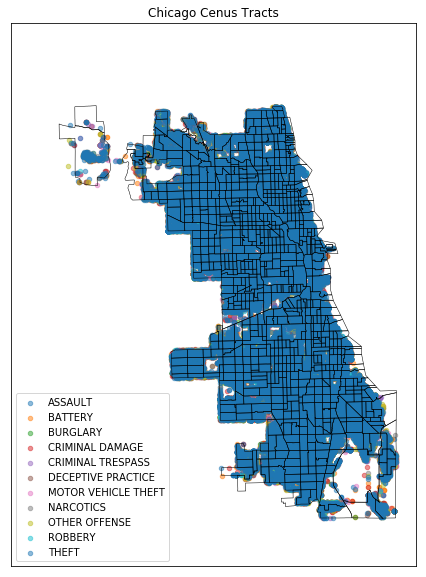

In [6]:
#part 4 

from mpl_toolkits.basemap import Basemap
import numpy as np
import matplotlib.pyplot as plt

fig = plt.figure(figsize=[16,10])
m = Basemap(projection='merc',llcrnrlat=41.60,urcrnrlat=42.10,\
        llcrnrlon=-88.0,urcrnrlon=-87.50,lat_ts=20,resolution='c')
m.readshapefile('./geo_export_0e3da441-8fe8-4e11-9ca0-42ef75cab68e','chicago')

mergedDF = pd.merge(cdataDF,primidDF,on='Primary Type ID')
mergedDF = mergedDF.sort_values(by = ['Date'])
#forward filling the data 
mergedDF['Latitude'] = mergedDF['Latitude'].ffill()
mergedDF['Longitude'] = mergedDF['Longitude'].ffill()

mergedData = pd.DataFrame(mergedDF.groupby(['Primary Type']).size())
HFCrimesList =[]
for  index, row in mergedData.iterrows():
    if(row[0] > 10000):
        HFCrimesList.append([index,row[0]])
        
HFCrimeTypesDF = pd.DataFrame(HFCrimesList)
HFCrimeTypesDF.columns = ['Primary Type','Count']
hfcrimes = HFCrimeTypesDF['Primary Type']
reducedDF = mergedDF.loc[mergedDF['Primary Type'].isin(hfcrimes)]
# coord=[] # long,lat
# hfCrimeNameList =[] 
for i in hfcrimes :
    long = []
    lat  = []
#     hfCrimeNameList.append(i)
    nameDF = reducedDF.loc[reducedDF['Primary Type'] == i]
    for index, row in nameDF.iterrows():  
        long.append(row['Longitude'])
        lat.append(row['Latitude'])
    x,y = m(long,lat)
    labelText = i
#     print(labelText)
    plt.scatter(x,y,alpha=0.5,s=20,label=labelText)
plt.title("Chicago Cenus Tracts")
plt.legend()
plt.show()

### Problem 2 - Benchmarking Problem (25 Points)

Numpy has in-built universal functions that allow operations on multidimentional arrays. For this problem, you will be asked to test the performance of some of this functions.

For this, create an `NxN` matrix `A` and an array `B` of size `N`, with random entries (use `numpy.random`). Using `A` and `B` as inputs, performing the following operations: (compare and time the performance of sorting algorithms with and without numpy ufunc)

1. Sorting `B` (you can use `numpy.sort`) for `N` ranging from 1000 to 25000 (take steps of 1000)
2. Computing Determinant of `A` ( you can use `numpy.linalg.det` to compute the determinant of the matrix) for `N` ranging from 100 to 800 (take steps of 50)
3. Matrix Multiplication of `A*A` ( use `numpy.matmul`) for `N` ranging from 100 to 1500 

Plot the operation times for Numpy functions vs regular python commands for each operation.

The final output must include 3 plots comparing the performance of universal functions in Numpy with similar analogs in python for each operation. Provide a breif interpretation from the plots. (Feel free to test around the range of `N` for this problem).

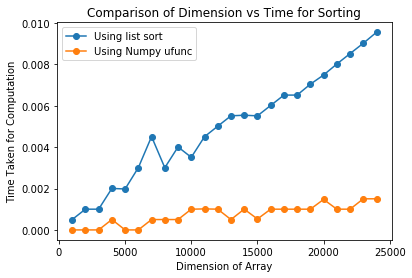

In [7]:
import time 
import numpy as np
import matplotlib.pyplot as plt
%matplotlib inline

#part1 : Sorting

def sorting() :
    np.random.seed(0)
    r = np.arange(1000,25000,1000)
    timeArray_Sort_np = []
    timeArray_Sort = []
    dim = []
    
    for i in r :
        #using numpy ufunc for sorting
        dim.append(i)
        array1 = np.random.rand(i)
        t_ini_np = time.time()
        np.sort(array1)
        t_fin_np = time.time()
        t_diff_np = t_fin_np-t_ini_np
        timeArray_Sort_np.append(t_diff_np)
        
        #for the non numpy process of sorting 
        array2 = np.random.rand(i)
        arr2List = list(array2)
        t_ini = time.time()
        arr2List.sort()
        t_fin = time.time()
        t_diff = t_fin-t_ini
        timeArray_Sort.append(t_diff)
    
#     print("the length of time array np is ",len(timeArray_Sort_np))
#     print("the length of time array is ",len(timeArray_Sort))
    
    plt.plot(dim,timeArray_Sort,marker='o',label='Using list sort')
    plt.plot(dim , timeArray_Sort_np,marker='o',label='Using Numpy ufunc')
    plt.xlabel("Dimension of Array")
    plt.ylabel("Time Taken for Computation")
    plt.legend()
    plt.title("Comparison of Dimension vs Time for Sorting")
    plt.show()
    
    
    
sorting()    

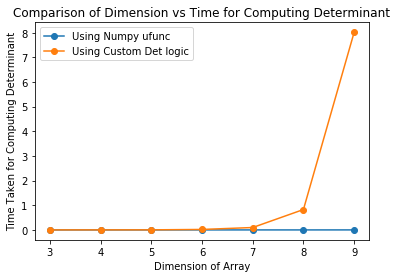

In [12]:
#part 2 : To compute Determinant
def determinant() :
    np.random.seed(0)
    r = np.arange(3,10)
    timeArray_Sort_np = []
    timeArray_Sort = []
    dim = []
    
    def customDet(A):
        if A.shape == (2,2):
            val = A[0,0]*A[1,1] - A[1,0]*A[0,1]
            return(val)
    
        else :
            d = 0
        for j in range(A.shape[1]):
            if j % 2 == 0 :
                n = 1
            else :
                n = -1 
            multiFactor = n * A[0,j]
            B = A.copy()
            B1 = np.delete(B,0,0)
            B2 = np.delete(B1,j,1)
            d = d + multiFactor * customDet(B2) 
        return(d)
     
    for i in r:
        dim.append(i)
        A = np.matrix(np.random.random(size=(i,i)))
#         A = np.matrix(np.random.randint(-2,3,size=(i,i)))
        t_ini_np = time.time()
        det_A = np.linalg.det(A)
        t_fin_np = time.time()
        t_diff_np = t_fin_np - t_ini_np
        timeArray_Sort_np.append(t_diff_np)
        
        #for the non numpy process of calculating determinant
        t_ini = time.time()
        det_A_non_numpy = customDet(A)
        t_fin = time.time()
        t_diff = t_fin - t_ini
        timeArray_Sort.append(t_diff)
    
    plt.plot(dim , timeArray_Sort_np,marker='o',label='Using Numpy ufunc')
    plt.plot(dim , timeArray_Sort ,marker='o',label='Using Custom Det logic')
    plt.xlabel("Dimension of Array")
    plt.ylabel("Time Taken for Computing Determinant")
    plt.legend()
    plt.title("Comparison of Dimension vs Time for Computing Determinant")
    plt.show()
        
determinant()  

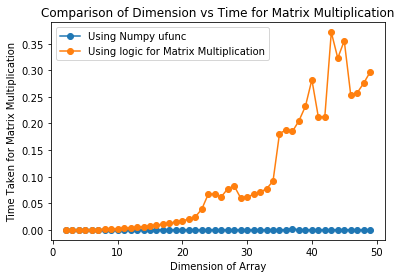

In [13]:
#part 3 For Matrix Multiplication

def matrixMul() :
    np.random.seed(0)
    r = np.arange(2,50)
    timeArray_Sort_np = []
    timeArray_Sort = []
    dim = []
    
    def customMatrixMul(A):
        #creating a dummy matrix with 0s of same shape as A
        R = np.matrix(np.zeros(A.shape))
        rowLength = A.shape[0]
        colLength = A.shape[1]
        for i in range(rowLength):
            for j in range(colLength):
                listMul = []
                for k in range(rowLength):
                    val = A[i,k] * A[k,j]
                    listMul.append(val)
                R[i,j] = sum(listMul)
        return(R)    
        
    for i in r:
        dim.append(i)
        A = np.matrix(np.random.random(size=(i,i)))
        t_ini_np = time.time()
        A_Sqr_np = np.matmul(A,A)
        t_fin_np = time.time()
        t_diff_np = t_fin_np - t_ini_np
        timeArray_Sort_np.append(t_diff_np)
    
        #for the non numpy process of matrix multiplication
        t_ini = time.time()
        A_Sqr = customMatrixMul(A)
        t_fin = time.time()
        t_diff = t_fin - t_ini
        timeArray_Sort.append(t_diff)

    plt.plot(dim , timeArray_Sort_np,marker='o',label='Using Numpy ufunc')
    plt.plot(dim , timeArray_Sort ,marker='o',label='Using logic for Matrix Multiplication')
    plt.xlabel("Dimension of Array")
    plt.ylabel("Time Taken for Matrix Multiplication")
    plt.legend()
    plt.title("Comparison of Dimension vs Time for Matrix Multiplication")
    plt.show()
        
matrixMul()  